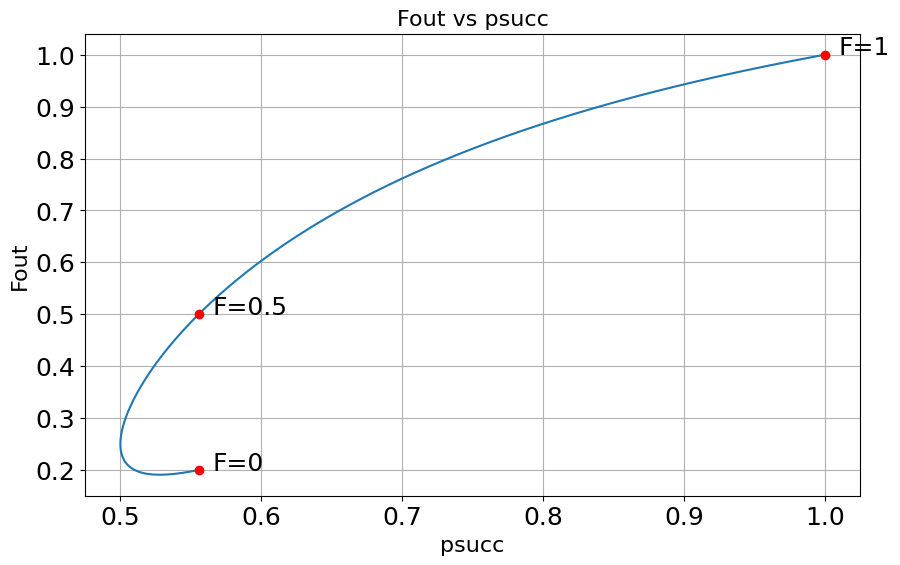

In [32]:
import numpy as np
import matplotlib.pyplot as plt


# Define the functions
def calculate_psucc(F):
    return F**2 + 2 * F * ((1 - F) / 3) + 5 * ((1 - F) / 3)**2

def calculate_Fout(F):
    psucc = calculate_psucc(F)
    return (F**2 + ((1 - F) / 3)**2) / psucc

# Generate data points
F_values = np.linspace(0, 1, 1000)  # 1000 points between 0 and 1
psucc_values = [calculate_psucc(F) for F in F_values]
Fout_values = [calculate_Fout(F) for F in F_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(psucc_values, Fout_values)
plt.xlabel('psucc')
plt.ylabel('Fout')
plt.title('Fout vs psucc')
plt.grid(True)

# Add markers for key points (F=0, F=0.5, F=1)
key_points = [0, 0.5, 1]
for F in key_points:
    psucc = calculate_psucc(F)
    Fout = calculate_Fout(F)
    plt.plot(psucc, Fout, 'ro')  # Red dot
    plt.annotate(f'F={F}', (psucc, Fout), xytext=(10, 0), 
                 textcoords='offset points')

plt.savefig('Fout_vs_psucc.svg', format='svg')
plt.show()

In [33]:
from plotting import *
from analysis import *

Linear fit results:
DEJMPS: slope = 2.4180, R² = 0.8408
BBPSSW: slope = 1.4952, R² = 0.7111
EPL with $X_B$: slope = 1.5981, R² = 0.7422


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Input fidelity 0.975'}, xlabel='Gate Fidelity', ylabel='Success probability'>)

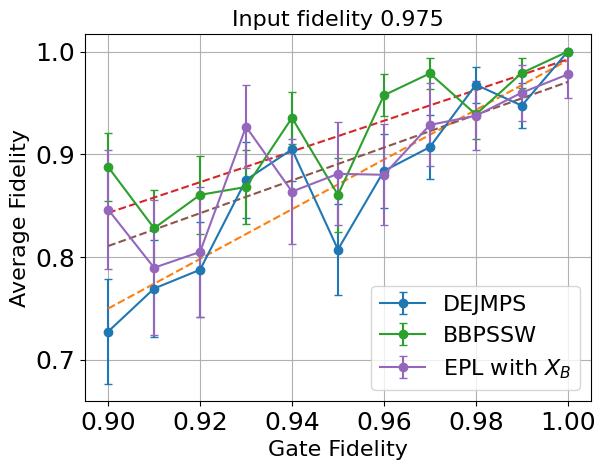

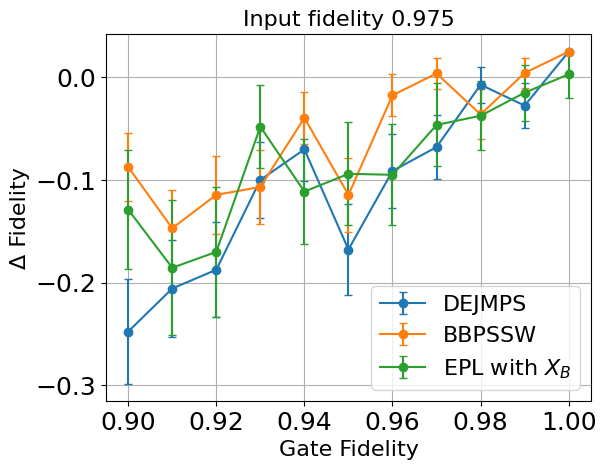

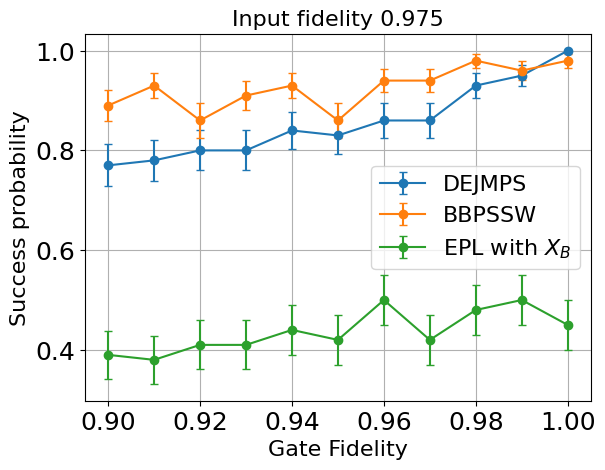

In [34]:
fr = (0.975, 0.975)
gr = (0.9, 1)
dejmps = analyze_multiple_combos(dejmps_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
bbpssw = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl = analyze_multiple_combos(epl_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_local = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)

results_list = [('DEJMPS', dejmps),
                ('BBPSSW', bbpssw),
                (r'EPL with $X_B$', epl_local)]
plot_fidelity(results_list, title='Input fidelity 0.975', delta=False, fit_lines=True)
plot_fidelity(results_list, title='Input fidelity 0.975', delta=True)
plot_success_prob(results_list, title='Input fidelity 0.975')


Processing input fidelity: 0.725
Generating plots for input fidelity 0.725
Linear fit results:
DEJMPS: slope = 2.3351, R² = 0.7444
BBPSSW: slope = 0.5378, R² = 0.1868
EPL with $X_B$: slope = 2.5994, R² = 0.7945

Processing input fidelity: 0.775
Generating plots for input fidelity 0.775
Linear fit results:
DEJMPS: slope = 2.2860, R² = 0.8048
BBPSSW: slope = 0.9309, R² = 0.4417
EPL with $X_B$: slope = 1.5335, R² = 0.6948

Processing input fidelity: 0.825
Generating plots for input fidelity 0.825
Linear fit results:
DEJMPS: slope = 2.7535, R² = 0.9466
BBPSSW: slope = 1.9938, R² = 0.6922
EPL with $X_B$: slope = 2.0130, R² = 0.6856

Processing input fidelity: 0.875
Generating plots for input fidelity 0.875
Linear fit results:
DEJMPS: slope = 3.0411, R² = 0.8934
BBPSSW: slope = 1.5137, R² = 0.8051
EPL with $X_B$: slope = 1.7427, R² = 0.4694

Processing input fidelity: 0.925
Generating plots for input fidelity 0.925
Linear fit results:
DEJMPS: slope = 1.9801, R² = 0.8912
BBPSSW: slope = 1.18

<Figure size 1000x700 with 0 Axes>

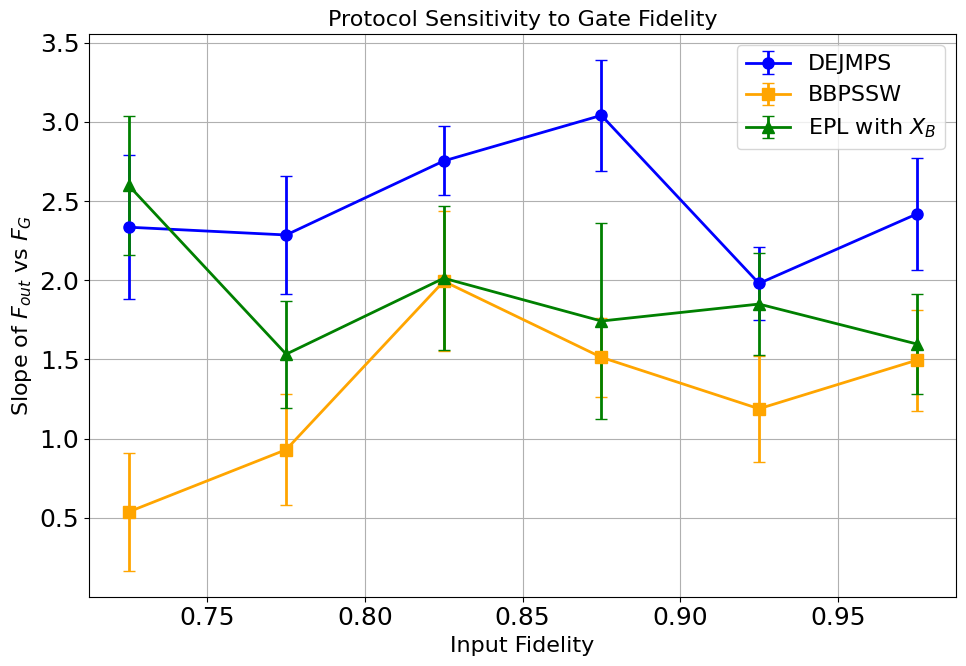

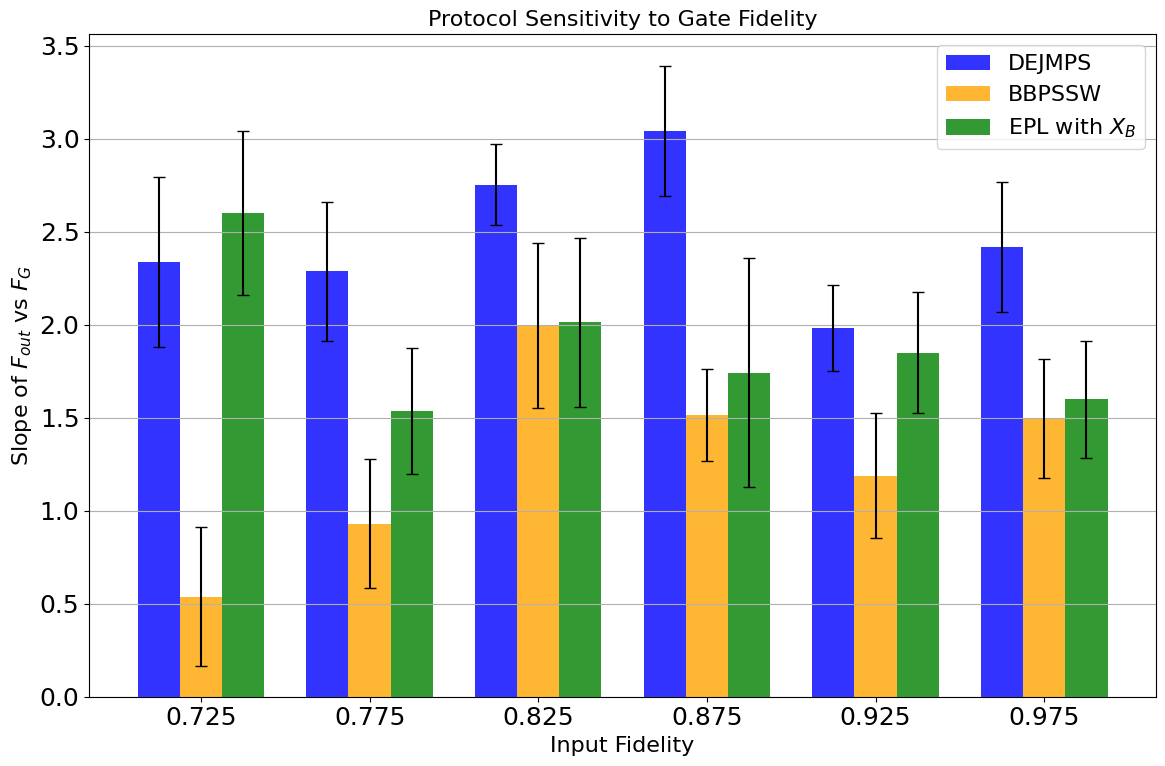

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# All input fidelities to analyze
all_fidelities = [0.725, 0.775, 0.825, 0.875, 0.925, 0.975]
gate_range = (0.9, 1)

# Store all slopes and fit results
all_slopes = {}
all_fit_results = {}
all_slope_errors = {}  # To store the standard errors of the slopes

# Create a figure for the final slope comparison
plt.figure(figsize=(10, 7))
colors = {'DEJMPS': 'blue', 'BBPSSW': 'orange', r'EPL with $X_B$': 'green'}
markers = {'DEJMPS': 'o', 'BBPSSW': 's', r'EPL with $X_B$': '^'}

# Process each input fidelity
for fid in all_fidelities:
    print(f"\nProcessing input fidelity: {fid}")
    fr = (fid, fid)
    
    # Get results for each protocol
    dejmps = analyze_multiple_combos(dejmps_data, fidelity_range=fr, gate_fidelity_range=gate_range, n_bootstrap=1000, seed=42)
    bbpssw = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, gate_fidelity_range=gate_range, n_bootstrap=1000, seed=42)
    epl_local = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, gate_fidelity_range=gate_range, n_bootstrap=1000, seed=42)
    
    results_list = [('DEJMPS', dejmps),
                   ('BBPSSW', bbpssw),
                   (r'EPL with $X_B$', epl_local)]
    
    # Plot and get slopes for fidelity
    print(f"Generating plots for input fidelity {fid}")
    
    # Regular fidelity plot with fits
    fig1, ax1, fit_results = plot_fidelity(
        results_list, 
        title=f'Input fidelity {fid}', 
        delta=False, 
        fit_lines=True,

    )
    
    # Delta fidelity plot
    fig2, ax2 = plot_fidelity(
        results_list, 
        title=f'Δ Fidelity - Input {fid}', 
        delta=True,

    )
    
    # Success probability plot
    fig3, ax3 = plot_success_prob(
        results_list, 
        title=f'Success Probability - Input {fid}',

    )
    
    # Store the slopes, standard errors, and fit results
    all_slopes[fid] = {protocol: result['slope'] for protocol, result in fit_results.items()}
    all_slope_errors[fid] = {protocol: result['std_err'] for protocol, result in fit_results.items()}
    all_fit_results[fid] = fit_results
    
    # Close figures to avoid memory issues
    plt.close(fig1)
    plt.close(fig2)
    plt.close(fig3)

# Create a table of slopes
print("\nSummary of Slopes (protocol sensitivity to gate fidelity):")
headers = ["Input Fidelity"] + [p for p, _ in results_list]
rows = []

for fid in all_fidelities:
    row = [f"{fid:.3f}"]
    for protocol, _ in results_list:
        slope = all_slopes[fid].get(protocol, float('nan'))
        row.append(f"{slope:.4f}")
    rows.append(row)

# Print the table
print(" | ".join(headers))
print("-" * (sum(len(h) + 3 for h in headers)))
for row in rows:
    print(" | ".join(row))

# Plot slopes vs input fidelity with error bars
plt.figure(figsize=(10, 7))

for protocol, _ in results_list:
    slopes = [all_slopes[fid].get(protocol, float('nan')) for fid in all_fidelities]
    errors = [all_slope_errors[fid].get(protocol, float('nan')) for fid in all_fidelities]
    
    plt.errorbar(all_fidelities, slopes, 
                 yerr=errors,
                 marker=markers.get(protocol, 'o'), 
                 label=protocol, 
                 color=colors.get(protocol, None),
                 linewidth=2,
                 markersize=8,
                 capsize=4)

plt.grid(True)
plt.xlabel('Input Fidelity')
plt.ylabel(r'Slope of $F_{out}$ vs $F_G$')
plt.title('Protocol Sensitivity to Gate Fidelity')
plt.legend()
plt.tight_layout()
plt.savefig('./plots/slope_vs_input_fidelity.svg', format='svg')
plt.savefig('./plots/slope_vs_input_fidelity.pdf', format='pdf')
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 16})
plt.show()

# Generate bar chart for easier comparison
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(all_fidelities))

for i, (protocol, _) in enumerate(results_list):
    slopes = [all_slopes[fid].get(protocol, float('nan')) for fid in all_fidelities]
    errors = [all_slope_errors[fid].get(protocol, float('nan')) for fid in all_fidelities]
    
    plt.bar(index + i*bar_width, slopes, bar_width, 
            label=protocol, 
            color=colors.get(protocol, None),
            alpha=0.8,
            yerr=errors,
            capsize=4)

plt.xlabel('Input Fidelity')
plt.ylabel(r'Slope of $F_{out}$ vs $F_G$')
plt.title('Protocol Sensitivity to Gate Fidelity')
plt.xticks(index + bar_width, [f"{fid:.3f}" for fid in all_fidelities])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('./plots/slope_comparison_bars.svg', format='svg')
plt.savefig('./plots/slope_comparison_bars.pdf', format='pdf')
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 16})
plt.show()